# Compare MLP and CNN in FashionMNIST dataset

In [1]:
from tensorflow.keras import datasets
from tensorflow.keras import layers, Model
from tensorflow.keras import Input
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [2]:
%%capture
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

## FashionMNIST with MLP

### Prepare Data 

In [4]:
X_train1 = train_images.reshape(60000, 28*28)
X_test1 = test_images.reshape(10000, 28*28)
X_train1 = X_train1.astype('float32') / 255.
X_test1 = X_test1.astype('float32') / 255.

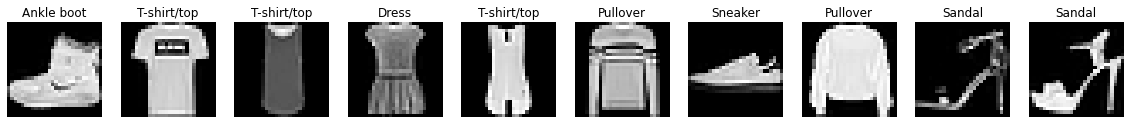

In [5]:
class_names = {0: 'T-shirt/top',
               1: 'Trouser',
               2: 'Pullover',
               3: 'Dress',
               4: 'Coat',
               5: 'Sandal',
               6: 'Shirt',
               7: 'Sneaker',
               8: 'Bag',
               9: 'Ankle boot'}

fig, axes = plt.subplots(1, 10, figsize=(20,2))
for i in range(len(axes)):
  axes[i].imshow(train_images[i], cmap='gray')
  axes[i].set_axis_off()
  axes[i].set_title(class_names[train_labels[i]])

### MLP Model

In [24]:
inp = Input(shape=(784,))
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(0.002))(inp)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.L2(0.002))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.2)(x)
out = layers.Dense(10, activation='softmax')(x)

model_mlp = Model(inputs=inp, outputs=out)
model_mlp.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0   

### Train MLP model

In [25]:
model_mlp.compile(optimizer=optimizers.Adam(learning_rate=0.005),
                  loss='sparse_categorical_crossentropy')
history1 = model_mlp.fit(X_train1, train_labels,
                         epochs=50, batch_size=512,
                         validation_data=(X_test1, test_labels))

Epoch 1/50
118/118 [==============================] - 2s 10ms/step - loss: 4.3339 - val_loss: 1.6894
Epoch 2/50
118/118 [==============================] - 1s 9ms/step - loss: 1.8458 - val_loss: 1.6397
Epoch 3/50
118/118 [==============================] - 1s 8ms/step - loss: 1.7473 - val_loss: 1.4739
Epoch 4/50
118/118 [==============================] - 1s 9ms/step - loss: 1.7432 - val_loss: 1.5143
Epoch 5/50
118/118 [==============================] - 1s 9ms/step - loss: 1.7288 - val_loss: 1.4557
Epoch 6/50
118/118 [==============================] - 1s 8ms/step - loss: 1.7595 - val_loss: 1.5511
Epoch 7/50
118/118 [==============================] - 1s 8ms/step - loss: 1.6697 - val_loss: 1.4819
Epoch 8/50
118/118 [==============================] - 1s 9ms/step - loss: 1.6543 - val_loss: 1.4366
Epoch 9/50
118/118 [==============================] - 1s 8ms/step - loss: 1.6879 - val_loss: 1.4132
Epoch 10/50
118/118 [==============================] - 1s 9ms/step - loss: 1.6150 - val_loss: 1.638

### Evaluation of MLP model

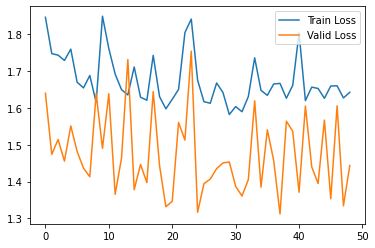

In [26]:
plt.plot(history1.history['loss'][1:], label='Train Loss')
plt.plot(history1.history['val_loss'][1:], label='Valid Loss')
plt.legend()

----------

## FashionMNIST with CNN

### Data Preparation

In [4]:
X_train2 = train_images.astype('float32') / 255.
X_test2 = test_images.astype('float32') / 255.
X_train2.shape

(60000, 28, 28)

### Model Design

In [10]:
inp = Input(shape=(28, 28, 1))
x = layers.Conv2D(16, 3, padding='same')(inp)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(9, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
out = layers.Dense(10, activation='softmax')(x)

model_cnn = Model(inputs=inp, outputs=out)
model_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 9)         1305

### Train CNN model

In [11]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
history2 = model_cnn.fit(X_train2, train_labels,
                         epochs=50, batch_size=512,
                         validation_data=(X_test2, test_labels))

Epoch 1/50
118/118 [==============================] - 2s 10ms/step - loss: 0.8530 - val_loss: 1.8835
Epoch 2/50
118/118 [==============================] - 1s 8ms/step - loss: 0.4642 - val_loss: 1.3482
Epoch 3/50
118/118 [==============================] - 1s 9ms/step - loss: 0.3954 - val_loss: 0.7007
Epoch 4/50
118/118 [==============================] - 1s 8ms/step - loss: 0.3564 - val_loss: 0.4302
Epoch 5/50
118/118 [==============================] - 1s 8ms/step - loss: 0.3341 - val_loss: 0.3553
Epoch 6/50
118/118 [==============================] - 1s 8ms/step - loss: 0.3172 - val_loss: 0.3261
Epoch 7/50
118/118 [==============================] - 1s 9ms/step - loss: 0.3008 - val_loss: 0.3222
Epoch 8/50
118/118 [==============================] - 1s 8ms/step - loss: 0.2913 - val_loss: 0.3380
Epoch 9/50
118/118 [==============================] - 1s 8ms/step - loss: 0.2803 - val_loss: 0.2966
Epoch 10/50
118/118 [==============================] - 1s 8ms/step - loss: 0.2726 - val_loss: 0.303

### Evaluation of CNN model

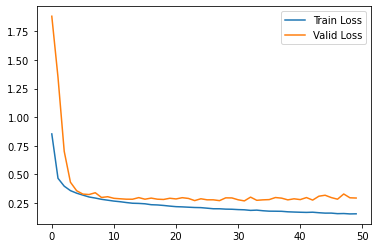

In [12]:
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Valid Loss')
plt.legend()

## Prediction

In [ ]:
pred_mlp = model_mlp.predict(X_test1)
pred_cnn = model_cnn.predict(X_test2)

313/313 [==============================] - 1s 2ms/step


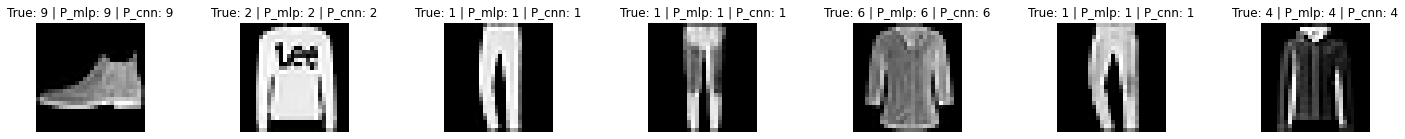

In [ ]:
import numpy as np

fig, axes = plt.subplots(1, 7, figsize=(25,2))
for i in range(len(axes)):
  axes[i].imshow(test_images[i], cmap='gray')
  axes[i].set_axis_off()

  title = f'True: {test_labels[i]} | P_mlp: {np.argmax(pred_mlp[i])} | P_cnn: {np.argmax(pred_cnn[i])}'
  axes[i].set_title(title)